In [1]:
import osmnx as ox
import networkx as nx
from pyvis.network import Network

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

KeyboardInterrupt: 

In [ ]:
from collections import deque, defaultdict
from collections import defaultdict

class DinitzMaxFlow:
    def __init__(self, graph, source, sink):
        self.graph = graph
        self.source = source
        self.sink = sink
        self.flow = {}
        self.level = {}
        
    def bfs(self):
        """ Build level graph """
        self.level = {node: -1 for node in self.graph}
        queue = deque([self.source])
        self.level[self.source] = 0
        while queue:
            u = queue.popleft()
            for v, capacity in self.graph[u].items():
                if self.level[v] < 0 and self.flow.get((u, v), 0) < capacity['capacity']:
                    self.level[v] = self.level[u] + 1
                    queue.append(v)
        return self.level[self.sink] >= 0

    def dfs(self, u, bottleneck=float('inf')):
        """ Find blocking flow in the layered graph """
        if u == self.sink:
            return bottleneck
        total_flow = 0
        for v, capacity in self.graph[u].items():
            residual_capacity = capacity['capacity'] - self.flow.get((u, v), 0)
            if self.level[v] == self.level[u] + 1 and residual_capacity > 0:
                min_cap = min(bottleneck, residual_capacity)
                pushed_flow = self.dfs(v, min_cap)
                if pushed_flow > 0:
                    self.flow[(u, v)] = self.flow.get((u, v), 0) + pushed_flow
                    self.flow[(v, u)] = self.flow.get((v, u), 0) - pushed_flow
                    total_flow += pushed_flow
                    bottleneck -= pushed_flow
                    if bottleneck == 0:
                        break
        return total_flow

    def max_flow(self):
        """ Calculate max flow using Dinitz's algorithm """
        max_flow_value = 0
        while self.bfs():
            flow = self.dfs(self.source)
            while flow:
                max_flow_value += flow
                flow = self.dfs(self.source)
        return max_flow_value
class FordFulkersonMaxFlow:
    def __init__(self, graph, source, sink):
        self.graph = graph
        self.source = source
        self.sink = sink
        self.flow = defaultdict(lambda: defaultdict(int))  # Dictionary to track flow on each edge

    def bfs(self):
        """BFS to find an augmenting path with available capacity."""
        parent = {self.source: None}  # Track the path with parent nodes
        queue = deque([self.source])
        
        while queue:
            u = queue.popleft()
            
            for v, capacity in self.graph[u].items():
                residual_capacity = capacity['capacity'] - self.flow[u][v]
                # Only proceed if there's residual capacity and v has not been visited
                if residual_capacity > 0 and v not in parent:
                    parent[v] = u
                    if v == self.sink:  # If we've reached the sink
                        return parent
                    queue.append(v)
        
        return None  # No augmenting path found

    def max_flow(self):
        """Calculate max flow using Ford-Fulkerson with BFS."""
        max_flow_value = 0
        
        while True:
            parent = self.bfs()
            if not parent:  # No more augmenting paths
                break
            
            # Find the maximum flow through the path found
            path_flow = float('Inf')
            s = self.sink
            while s != self.source:
                u = parent[s]
                path_flow = min(path_flow, self.graph[u][s]['capacity'] - self.flow[u][s])
                s = u
            
            # update residual capacities of the edges and reverse edges
            v = self.sink
            while v != self.source:
                u = parent[v]
                self.flow[u][v] += path_flow
                self.flow[v][u] -= path_flow
                v = u
            
            max_flow_value += path_flow  # Add path flow to overall flow
        
        return max_flow_value

class EdmondsKarpMaxFlow:
    def __init__(self, graph, source, sink):
        self.graph = graph
        self.source = source
        self.sink = sink
        self.flow = defaultdict(lambda: defaultdict(int))  # Dictionary to store flow along each edge

    def bfs(self, parent):
        """Find path with BFS to check for augmenting paths."""
        visited = {node: False for node in self.graph}
        queue = deque([self.source])
        visited[self.source] = True
        
        while queue:
            u = queue.popleft()
            for v, capacity in self.graph[u].items():
                residual_capacity = capacity['capacity'] - self.flow[u][v]
                if not visited[v] and residual_capacity > 0:  # Only proceed if there is residual capacity
                    parent[v] = u
                    if v == self.sink:
                        return True
                    queue.append(v)
                    visited[v] = True
        return False

    def max_flow(self):
        """Calculate the max flow using Edmonds-Karp."""
        parent = {}
        max_flow_value = 0

        while self.bfs(parent):
            # Find the maximum flow possible on the path found by BFS
            path_flow = float('inf')
            v = self.sink
            while v != self.source:
                u = parent[v]
                path_flow = min(path_flow, self.graph[u][v]['capacity'] - self.flow[u][v])
                v = u

            # Update residual capacities along the path
            v = self.sink
            while v != self.source:
                u = parent[v]
                self.flow[u][v] += path_flow
                self.flow[v][u] -= path_flow
                v = u

            max_flow_value += path_flow

        return max_flow_value


In [ ]:
import osmnx as ox
import geopandas as gpd

# Get boundaries of Ho Chi Minh City
city = ox.geocode_to_gdf("Ho Chi Minh City, Vietnam")

# Retrieve the districts within Ho Chi Minh City
districts = ox.geometries_from_place("Ho Chi Minh City, Vietnam", tags={"boundary": "administrative"})

# Filter the districts at the correct administrative level
# Assuming districts are level 3 in Vietnam (this may vary, so check if necessary)
districts = districts[districts["admin_level"] == "3"]

# Extract district names
district_names = districts["name"].tolist()

# Display list of district names
print(district_names)


/tmp/ipykernel_1302300/459320841.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  districts = ox.geometries_from_place("Ho Chi Minh City, Vietnam", tags={"boundary": "administrative"})


[]


In [ ]:
import osmnx as ox
import networkx as nx
from pyvis.network import Network

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to find the nearest node to a street
def find_nearest_node(graph, street_name):
    for u, v, data in graph.edges(data=True):
        if 'name' in data and data['name'] == street_name:
            return u  # Return the starting node of the edge
    return None

# Define the two street names
street1 = "Sư Vạn Hạnh"  # Replace with actual street name
street2 = "Lý Thường Kiệt"  # Replace with actual street name

# Find nodes for the given street names
node1 = find_nearest_node(graph, street1)
node2 = find_nearest_node(graph, street2)

if node1 is None or node2 is None:
    print("One of the streets was not found.")
else:
    # Create a directed graph for flow calculations
    flow_graph = nx.DiGraph()

    # Add edges to the flow graph with capacities (assuming length as capacity)
    for u, v, data in graph.edges(data=True):
        capacity = 1 / data['length']  # Inverse of the length as capacity
        flow_graph.add_edge(u, v, capacity=capacity)
        flow_graph.add_edge(v, u, capacity=capacity)  # Add reverse edge for undirected flow

    # Calculate maximum flow
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2)

    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")


The maximum flow from Sư Vạn Hạnh to Lý Thường Kiệt is: 0.021270137560545445


The maximum flow from Sư Vạn Hạnh to Lý Thường Kiệt is: 0.021270137560545445


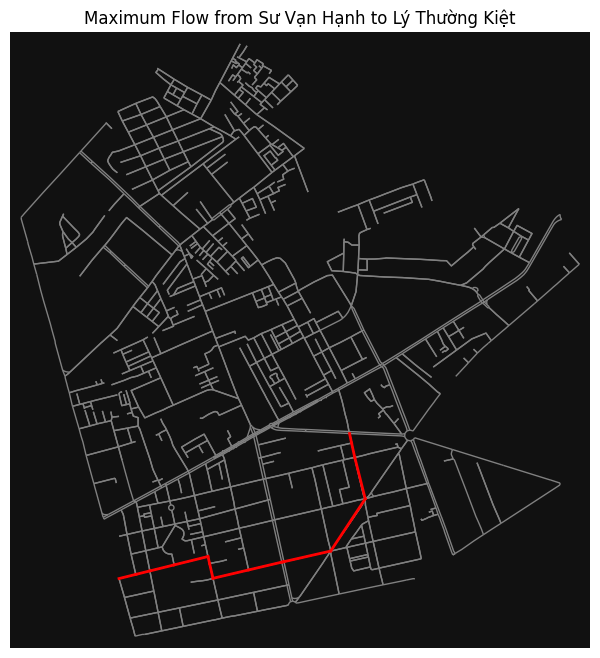

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to find the nearest node to a street
def find_nearest_node(graph, street_name):
    for u, v, data in graph.edges(data=True):
        if 'name' in data and data['name'] == street_name:
            return u  # Return the starting node of the edge
    return None

# Define the two street names
street1 = "Sư Vạn Hạnh"  # Replace with actual street name
street2 = "Lý Thường Kiệt" 

# Find nodes for the given street names
node1 = find_nearest_node(graph, street1)
node2 = find_nearest_node(graph, street2)

if node1 is None or node2 is None:
    print("One of the streets was not found.")
else:
    # Create a directed graph for flow calculations
    flow_graph = nx.DiGraph()

    # Add edges to the flow graph with capacities (assuming length as capacity)
    for u, v, data in graph.edges(data=True):
        capacity = 1 / data['length']  # Inverse of the length as capacity
        flow_graph.add_edge(u, v, capacity=capacity)
        flow_graph.add_edge(v, u, capacity=capacity)  # Add reverse edge for undirected flow

    # Calculate maximum flow
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2)
    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")

    # Plot the original graph
    fig, ax = ox.plot_graph(graph, node_size=0, edge_color='gray', show=False)

    # Get the flow path for visualization
    flow_path = nx.shortest_path(flow_graph, source=node1, target=node2)

    # Extract edges of the flow path for plotting
    flow_edges = list(zip(flow_path[:-1], flow_path[1:]))

    # Plot flow path in red
    for u, v in flow_edges:
        ax.add_line(plt.Line2D([graph.nodes[u]['x'], graph.nodes[v]['x']],
                                 [graph.nodes[u]['y'], graph.nodes[v]['y']],
                                 color='red', linewidth=2))

    plt.title(f'Maximum Flow from {street1} to {street2}')
    plt.show()


The maximum flow from Sư Vạn Hạnh to Lý Thường Kiệt is: 0.021270137560545445


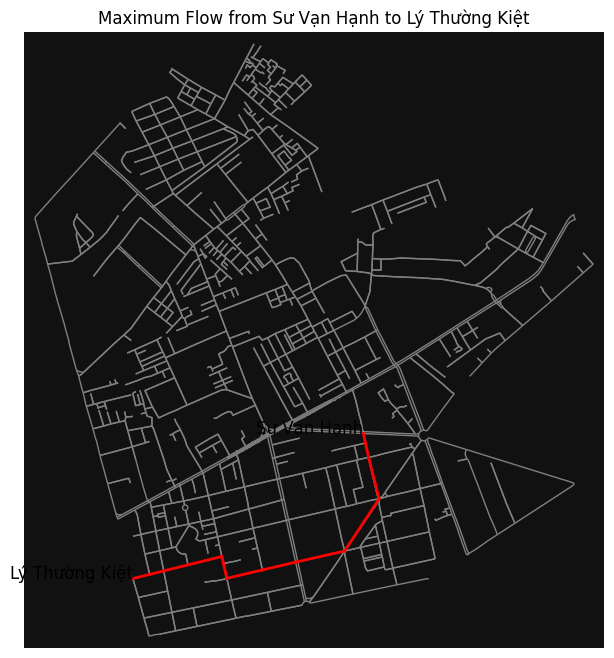

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to find the nearest node to a street
def find_nearest_node(graph, street_name):
    for u, v, data in graph.edges(data=True):
        if 'name' in data and data['name'] == street_name:
            return u  # Return the starting node of the edge
    return None

street1 = "Sư Vạn Hạnh"  # Replace with actual street name
street2 = "Lý Thường Kiệt" 

# Find nodes for the given street names
node1 = find_nearest_node(graph, street1)
node2 = find_nearest_node(graph, street2)

if node1 is None or node2 is None:
    print("One of the streets was not found.")
else:
    # Create a directed graph for flow calculations
    flow_graph = nx.DiGraph()

    # Add edges to the flow graph with capacities (assuming length as capacity)
    for u, v, data in graph.edges(data=True):
        capacity = 1 / data['length']  # Inverse of the length as capacity
        flow_graph.add_edge(u, v, capacity=capacity)
        flow_graph.add_edge(v, u, capacity=capacity)  # Add reverse edge for undirected flow

    # Calculate maximum flow
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2)
    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")

    # Plot the original graph
    fig, ax = ox.plot_graph(graph, node_size=0, edge_color='gray', show=False)

    # Get the flow path for visualization
    flow_path = nx.shortest_path(flow_graph, source=node1, target=node2)

    # Extract edges of the flow path for plotting
    flow_edges = list(zip(flow_path[:-1], flow_path[1:]))

    # Plot flow path in red
    for u, v in flow_edges:
        ax.add_line(plt.Line2D([graph.nodes[u]['x'], graph.nodes[v]['x']],
                                 [graph.nodes[u]['y'], graph.nodes[v]['y']],
                                 color='red', linewidth=2))

    # Add street name annotations
    pos_street1 = graph.nodes[node1]
    pos_street2 = graph.nodes[node2]
    
    ax.text(pos_street1['x'], pos_street1['y'], street1, fontsize=12, ha='right', color='black')
    ax.text(pos_street2['x'], pos_street2['y'], street2, fontsize=12, ha='right', color='black')

    plt.title(f'Maximum Flow from {street1} to {street2}')
    plt.show()


The maximum flow from Trường Sơn to Lý Thường Kiệt is: 3392
The maximum flow from Trường Sơn to Lý Thường Kiệt is: 3392
The maximum flow from Trường Sơn to Lý Thường Kiệt is: 3392


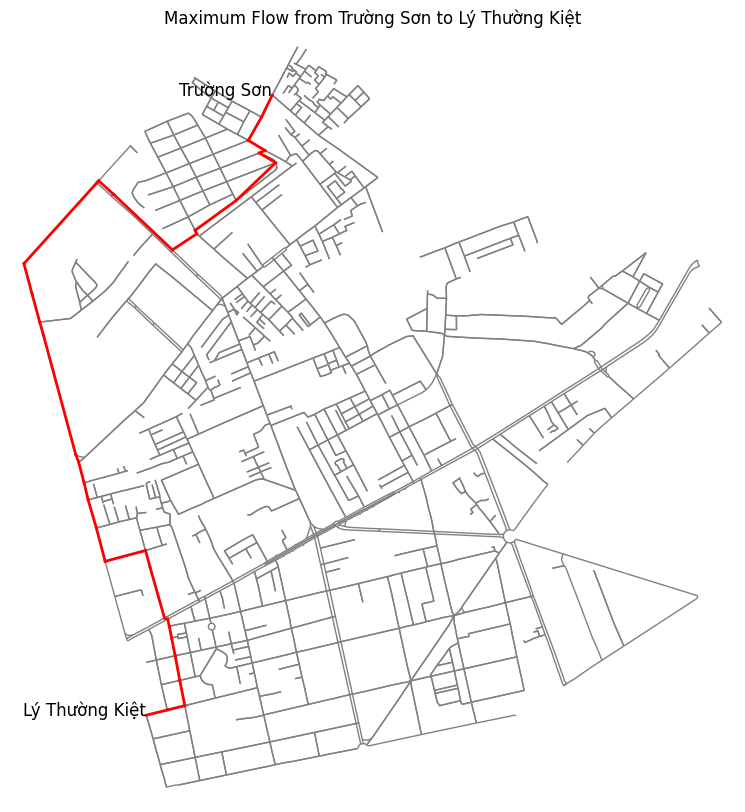

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.algorithms.flow import shortest_augmenting_path, edmonds_karp, dinitz
# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to find the nearest node to a street
def find_nearest_node(graph, street_name):
    for u, v, data in graph.edges(data=True):
        if 'name' in data and data['name'] == street_name:
            return u  # Return the starting node of the edge
    return None


street1 = "Trường Sơn"  # Replace with actual street name
street2 = "Lý Thường Kiệt" 
# Replace with actual street name

# Find nodes for the given street names
node1 = find_nearest_node(graph, street1)
node2 = find_nearest_node(graph, street2)

if node1 is None or node2 is None:
    print("One of the streets was not found.")
else:
    # Create a directed graph for flow calculations
    flow_graph = nx.DiGraph()

    # Add edges to the flow graph with capacities (assuming length as capacity)
    for u, v, data in graph.edges(data=True):
        capacity =  random.randint(0, 18888)# Inverse of the length as capacity
        flow_graph.add_edge(u, v, capacity=capacity)
        flow_graph.add_edge(v, u, capacity=capacity)  # Add reverse edge for undirected flow

    # Calculate maximum flow
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2, flow_func=dinitz)
    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2, flow_func=edmonds_karp)
    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")
    flow_value, flow_dict = nx.maximum_flow(flow_graph, _s=node1, _t=node2, )
    print(f"The maximum flow from {street1} to {street2} is: {flow_value}")


    # Plot the original graph with a white background
    fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the size as needed
    ax.set_facecolor('white')  # Set the background color to white
    ox.plot_graph(graph, node_size=0, edge_color='gray', ax=ax, show=False)

    # Get the flow path for visualization
    flow_path = nx.shortest_path(flow_graph, source=node1, target=node2)

    # Extract edges of the flow path for plotting
    flow_edges = list(zip(flow_path[:-1], flow_path[1:]))

    # Plot flow path in red
    for u, v in flow_edges:
        ax.add_line(plt.Line2D([graph.nodes[u]['x'], graph.nodes[v]['x']],
                                 [graph.nodes[u]['y'], graph.nodes[v]['y']],
                                 color='red', linewidth=2))

    # Add street name annotations
    pos_street1 = graph.nodes[node1]
    pos_street2 = graph.nodes[node2]
    
    ax.text(pos_street1['x'], pos_street1['y'], street1, fontsize=12, ha='right', color='black')
    ax.text(pos_street2['x'], pos_street2['y'], street2, fontsize=12, ha='right', color='black')

    plt.title(f'Maximum Flow from {street1} to {street2}')
    plt.show()


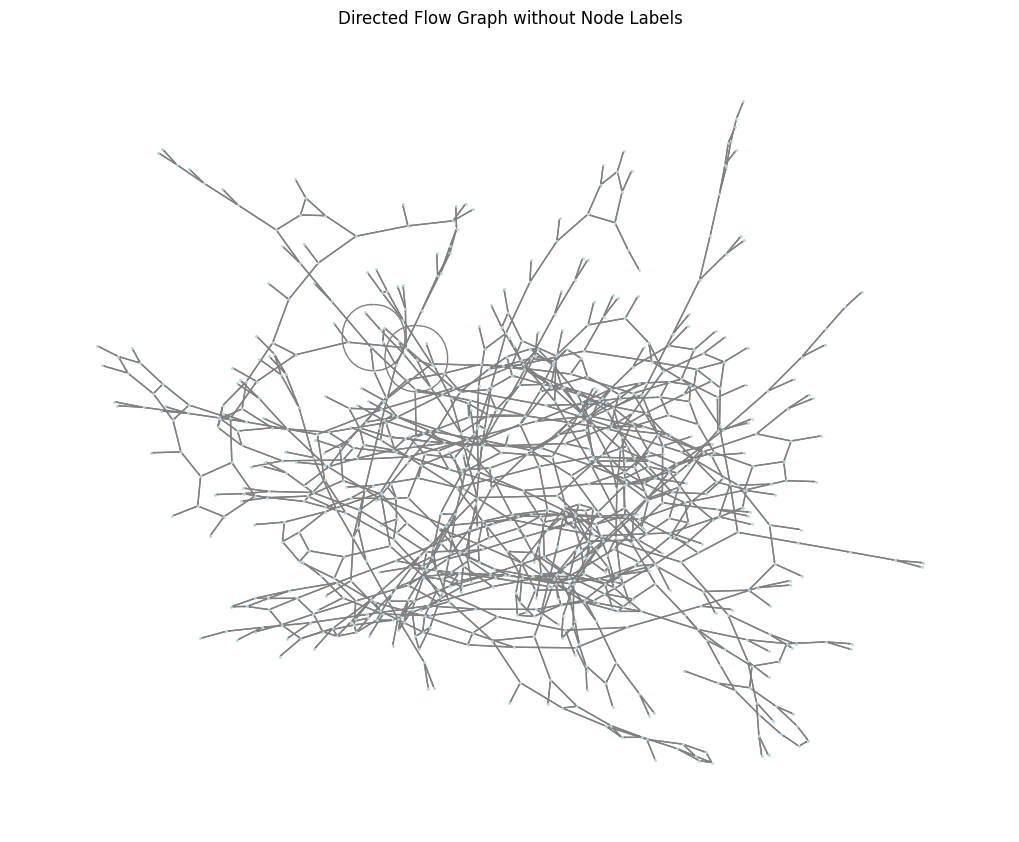

The maximum flow from Trường Sơn to Lý Thường Kiệt using Dinitz's algorithm is: 3612
time: 0.19046724028885365
The maximum flow from Trường Sơn to Lý Thường Kiệt using FordFulkerson's algorithm is: 3612
time: 0.030474431812763214
The maximum flow from Trường Sơn to Lý Thường Kiệt using EdmondsKarp's algorithm is: 3612
time: 0.030417880043387413


In [17]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to plot flow graph
def plot_flow_graph(graph, title="Flow Graph with Random Capacities"):
    # Filter nodes that have 'x' and 'y' attributes
    pos = {node: (data['x'], data['y']) for node, data in graph.nodes(data=True) if 'x' in data and 'y' in data}
    
    # Remove edges that connect to nodes without positions
    graph = graph.edge_subgraph([(u, v) for u, v in graph.edges if u in pos and v in pos]).copy()
    
    plt.figure(figsize=(12, 12))
    plt.title(title)
    
    # Draw nodes with positions
    nx.draw_networkx_nodes(graph, pos, node_size=20, node_color="blue")

    # Check for capacity attributes on edges
    capacities = nx.get_edge_attributes(graph, 'capacity')
    print(capacities)
    if capacities:
        edges, capacities = zip(*capacities.items())
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color="grey", alpha=0.5)
        
        # Label edges with capacities (if there are not too many)
        if len(capacities) < 100:  # Limit number of edge labels for clarity
            edge_labels = {(u, v): f"{data['capacity']}" for u, v, data in graph.edges(data=True)}
            nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)
    else:
        print("No capacity attributes found on edges.")

    plt.show()

# Define streets
street1 = "Trường Sơn"
street2 = "Lý Thường Kiệt"

# Find nodes for the given street names
def find_nearest_node(graph, street_name):
    for u, v, data in graph.edges(data=True):
        if 'name' in data and data['name'] == street_name:
            return u  # Return the starting node of the edge
    return None

node1 = find_nearest_node(graph, street1)
node2 = find_nearest_node(graph, street2)

if node1 is None or node2 is None:
    print("One of the streets was not found.")
else:
    # Create a directed graph with random capacities
    flow_graph = nx.DiGraph()
    for u, v, data in graph.edges(data=True):
        capacity = random.randint(1, 18888)  # Assign random capacity
        flow_graph.add_edge(u, v, capacity=capacity)
        flow_graph.add_edge(v, u, capacity=capacity)
    # Check capacities after adding edges
    # plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(flow_graph)
    plt.figure(figsize=(10, 8))
    nx.draw(flow_graph, pos, with_labels=False, node_size=1, node_color="lightblue", 
            edge_color="gray", arrowsize=1)

    plt.title("Directed Flow Graph without Node Labels")
    plt.show()

    # Calculate max flow using custom Dinitz's algorithm
    start = time.perf_counter()
    dinitz_algo = maximum_flow.DinitzMaxFlow(flow_graph, node1, node2)
    max_flow_value = dinitz_algo.max_flow()
    print(f"The maximum flow from {street1} to {street2} using Dinitz's algorithm is: {max_flow_value}")
    print(f"time: {time.perf_counter()-start}")
    start = time.perf_counter()
    FordFulkerson_algo = maximum_flow.FordFulkersonMaxFlow(flow_graph, node1, node2)
    max_flow_value = FordFulkerson_algo.max_flow()
    print(f"The maximum flow from {street1} to {street2} using FordFulkerson's algorithm is: {max_flow_value}")
    print(f"time: {time.perf_counter()-start}")
    start = time.perf_counter()
    EdmondsKarp_algo = maximum_flow.EdmondsKarpMaxFlow(flow_graph, node1, node2)
    max_flow_value = EdmondsKarp_algo.max_flow()
    print(f"The maximum flow from {street1} to {street2} using EdmondsKarp's algorithm is: {max_flow_value}")
    print(f"time: {time.perf_counter()-start}")
    

In [ ]:
# class DinitzMaxFlow:
#     def __init__(self, graph, source, sink):
#         self.graph = graph
#         self.source = source
#         self.sink = sink
#         self.flow = {}
#         self.level = {}
        
#     def bfs(self):
#         """ Build level graph """
#         self.level = {node: -1 for node in self.graph}
#         queue = deque([self.source])
#         self.level[self.source] = 0
#         while queue:
#             u = queue.popleft()
#             for v, capacity in self.graph[u].items():
#                 if self.level[v] < 0 and self.flow.get((u, v), 0) < capacity['capacity']:
#                     self.level[v] = self.level[u] + 1
#                     queue.append(v)
#         return self.level[self.sink] >= 0

#     def dfs(self, u, bottleneck=float('inf')):
#         """ Find blocking flow in the layered graph """
#         if u == self.sink:
#             return bottleneck
#         total_flow = 0
#         for v, capacity in self.graph[u].items():
#             residual_capacity = capacity['capacity'] - self.flow.get((u, v), 0)
#             if self.level[v] == self.level[u] + 1 and residual_capacity > 0:
#                 min_cap = min(bottleneck, residual_capacity)
#                 pushed_flow = self.dfs(v, min_cap)
#                 if pushed_flow > 0:
#                     self.flow[(u, v)] = self.flow.get((u, v), 0) + pushed_flow
#                     self.flow[(v, u)] = self.flow.get((v, u), 0) - pushed_flow
#                     total_flow += pushed_flow
#                     bottleneck -= pushed_flow
#                     if bottleneck == 0:
#                         break
#         return total_flow

#     def max_flow(self):
#         """ Calculate max flow using Dinitz's algorithm """
#         max_flow_value = 0
#         while self.bfs():
#             flow = self.dfs(self.source)
#             while flow:
#                 max_flow_value += flow
#                 flow = self.dfs(self.source)
#         return max_flow_value

In [ ]:
# from collections import defaultdict

# class FordFulkersonMaxFlow:
#     def __init__(self, graph, source, sink):
#         self.graph = graph
#         self.source = source
#         self.sink = sink
#         self.flow = defaultdict(lambda: defaultdict(int))  # Dictionary to track flow on each edge

#     def dfs(self, u, flow, visited):
#         """DFS to find an augmenting path with available capacity."""
#         if u == self.sink:  # If we've reached the sink, return the flow value
#             return flow
        
#         visited.add(u)
        
#         for v, capacity in self.graph[u].items():
#             residual_capacity = capacity['capacity'] - self.flow[u][v]
#             # Only proceed if there's residual capacity and the node hasn't been visited
#             if residual_capacity > 0 and v not in visited:
#                 # Find the minimum capacity in the path recursively
#                 min_flow = min(flow, residual_capacity)
#                 augment_flow = self.dfs(v, min_flow, visited)
                
#                 if augment_flow > 0:  # If an augmenting flow is found
#                     # Update the forward and backward flow values
#                     self.flow[u][v] += augment_flow
#                     self.flow[v][u] -= augment_flow
#                     return augment_flow
        
#         return 0  # No augmenting path found

#     def max_flow(self):
#         """Calculate max flow using Ford-Fulkerson."""
#         max_flow_value = 0
#         while True:
#             visited = set()
#             augment_flow = self.dfs(self.source, float('inf'), visited)
#             if augment_flow == 0:  # No more augmenting paths
#                 break
#             max_flow_value += augment_flow
#         return max_flow_value


In [ ]:
# from collections import deque, defaultdict

# class EdmondsKarpMaxFlow:
#     def __init__(self, graph, source, sink):
#         self.graph = graph
#         self.source = source
#         self.sink = sink
#         self.flow = defaultdict(lambda: defaultdict(int))  # Dictionary to store flow along each edge

#     def bfs(self, parent):
#         """Find path with BFS to check for augmenting paths."""
#         visited = {node: False for node in self.graph}
#         queue = deque([self.source])
#         visited[self.source] = True
        
#         while queue:
#             u = queue.popleft()
#             for v, capacity in self.graph[u].items():
#                 residual_capacity = capacity['capacity'] - self.flow[u][v]
#                 if not visited[v] and residual_capacity > 0:  # Only proceed if there is residual capacity
#                     parent[v] = u
#                     if v == self.sink:
#                         return True
#                     queue.append(v)
#                     visited[v] = True
#         return False

#     def max_flow(self):
#         """Calculate the max flow using Edmonds-Karp."""
#         parent = {}
#         max_flow_value = 0

#         while self.bfs(parent):
#             # Find the maximum flow possible on the path found by BFS
#             path_flow = float('inf')
#             v = self.sink
#             while v != self.source:
#                 u = parent[v]
#                 path_flow = min(path_flow, self.graph[u][v]['capacity'] - self.flow[u][v])
#                 v = u

#             # Update residual capacities along the path
#             v = self.sink
#             while v != self.source:
#                 u = parent[v]
#                 self.flow[u][v] += path_flow
#                 self.flow[v][u] -= path_flow
#                 v = u

#             max_flow_value += path_flow

#         return max_flow_value
